# TASK 7
1. Dimensionality Reduction – Using Principal Component Analysis (PCA) for
visualization.
2. Stock Price Prediction – Using Time Series Forecasting with ARIMA.

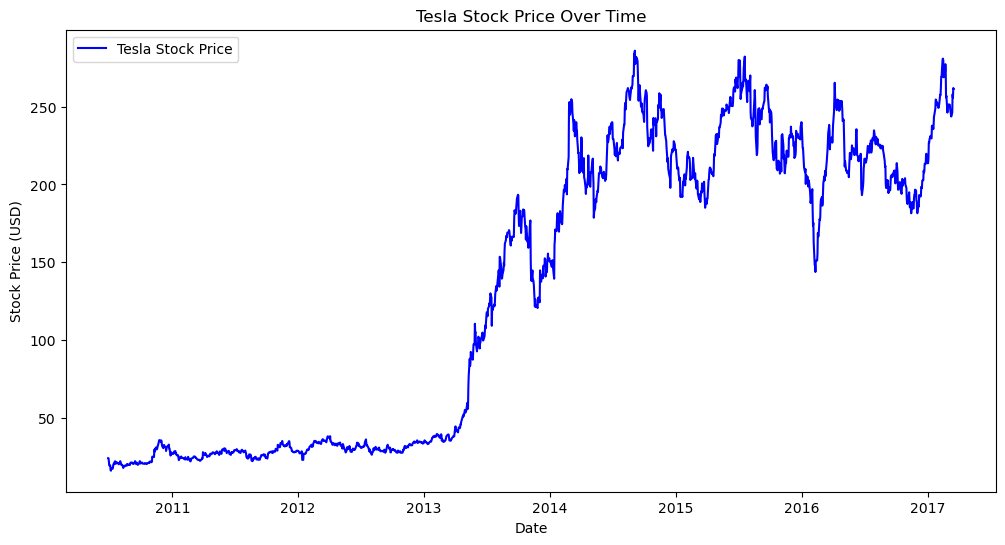


Model Evaluation Metrics:
Mean Absolute Error (MAE): 19.82
Root Mean Squared Error (RMSE): 25.08


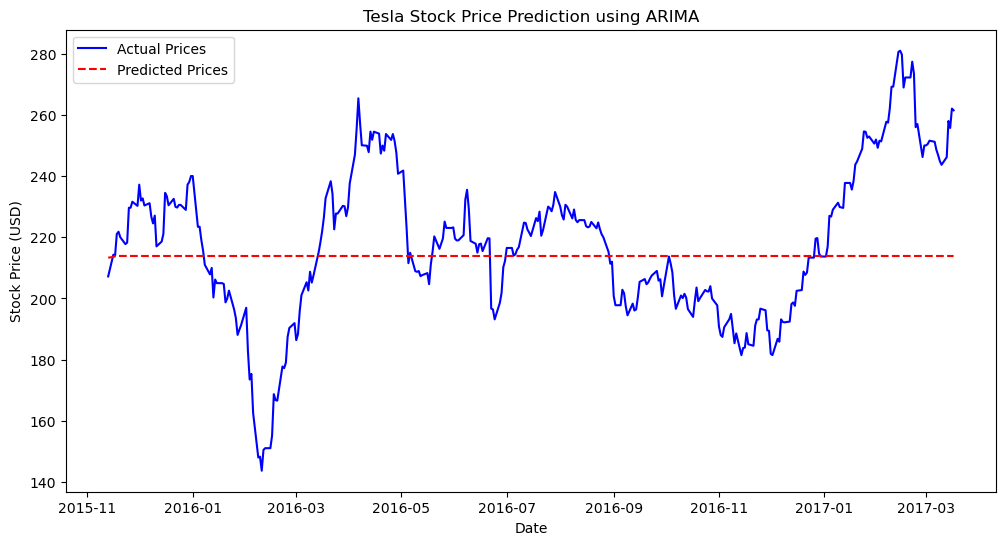

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_absolute_error, mean_squared_error

# ---- Load Tesla Stock Dataset ----
file_path = "Tesla.csv - Tesla.csv.csv"
tesla_data = pd.read_csv(file_path)

# Convert Date to datetime format and set as index
tesla_data['Date'] = pd.to_datetime(tesla_data['Date'])
tesla_data.set_index('Date', inplace=True)

# Infer and set frequency
detected_freq = pd.infer_freq(tesla_data.index)
if detected_freq:
    tesla_data = tesla_data.asfreq(detected_freq)
else:
    tesla_data = tesla_data.asfreq('B')  # Default to business days

# Selecting the 'Close' price for prediction
stock_data = tesla_data[['Close']].ffill()  # Fill missing values

# Plot historical stock prices
plt.figure(figsize=(12, 6))
plt.plot(stock_data, label="Tesla Stock Price", color='blue')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Over Time")
plt.legend()
plt.show()

# ---- Train-Test Split ----
train_size = int(len(stock_data) * 0.8)
train, test = stock_data[:train_size], stock_data[train_size:]

# ---- Fit ARIMA Model ----
model = ARIMA(train['Close'], order=(5,1,0), freq=tesla_data.index.freq)
model_fit = model.fit()

# Forecasting
forecast = model_fit.forecast(steps=len(test))

# ---- Model Evaluation ----
mae = mean_absolute_error(test['Close'], forecast)
mse = mean_squared_error(test['Close'], forecast)
rmse = np.sqrt(mse)

print("\nModel Evaluation Metrics:")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")

# ---- Plot Actual vs Predicted Prices ----
plt.figure(figsize=(12, 6))
plt.plot(test.index, test['Close'], label="Actual Prices", color='blue')
plt.plot(test.index, forecast, label="Predicted Prices", color='red', linestyle='dashed')
plt.xlabel("Date")
plt.ylabel("Stock Price (USD)")
plt.title("Tesla Stock Price Prediction using ARIMA")
plt.legend()
plt.show()
